# Microarray

In [1]:
import pandas as pd
import numpy as np

# Define the number of samples and genes
num_samples = 200  # Number of samples
num_genes = 500  # Number of genes

# Generate synthetic data
np.random.seed(0)  # Set random seed for reproducibility

# Create a dataframe with random gene expression values
data = pd.DataFrame(np.random.rand(num_samples, num_genes), columns=[f'Gene_{i}' for i in range(1, num_genes+1)])

# Add a column for the group labels
group_labels = ['Control', 'Diseased', 'Other Suitable Group']
data['Group'] = np.random.choice(group_labels, size=num_samples)

# Save the dataframe to a CSV file
data.to_csv('microarray_data.csv', index=False)

# Confirm the file creation
print("CSV file 'microarray_data.csv' has been created successfully.")


CSV file 'microarray_data.csv' has been created successfully.


In [ ]:
! pip install statsmodels


     Gene_1    Gene_2    Gene_3    Gene_4    Gene_5    Gene_6    Gene_7  \
0  0.548814  0.715189  0.602763  0.544883  0.423655  0.645894  0.437587   
1  0.310381  0.373035  0.524970  0.750595  0.333507  0.924159  0.862319   
2  0.592880  0.010064  0.475826  0.708770  0.043975  0.879521  0.520081   
3  0.446793  0.836990  0.221824  0.493945  0.929619  0.667215  0.798079   
4  0.811518  0.476084  0.523156  0.250521  0.605043  0.302905  0.577284   

     Gene_8    Gene_9   Gene_10  ...  Gene_492  Gene_493  Gene_494  Gene_495  \
0  0.891773  0.963663  0.383442  ...  0.592230  0.896761  0.406733  0.552078   
1  0.048690  0.253643  0.446136  ...  0.322830  0.229567  0.506863  0.736853   
2  0.030661  0.224414  0.953676  ...  0.657862  0.359453  0.900367  0.983275   
3  0.550994  0.980466  0.588662  ...  0.875200  0.027653  0.660339  0.414439   
4  0.169678  0.159469  0.417030  ...  0.043271  0.800761  0.377430  0.670239   

   Gene_496  Gene_497  Gene_498  Gene_499  Gene_500                 

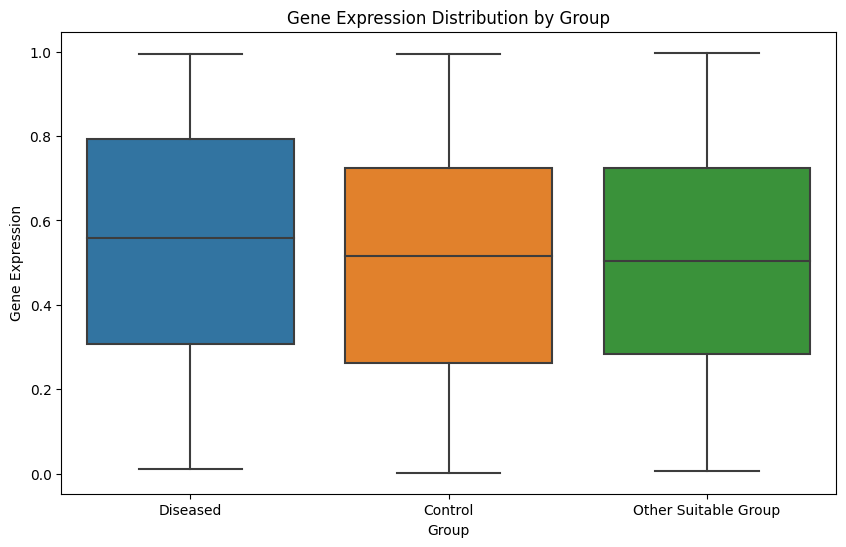

C:\Users\paul\AppData\Local\Temp\ipykernel_19744\2445124984.py:48: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  fold_changes = diseased_group.mean() - control_group.mean()
C:\Users\paul\AppData\Local\Temp\ipykernel_19744\2445124984.py:48: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  fold_changes = diseased_group.mean() - control_group.mean()


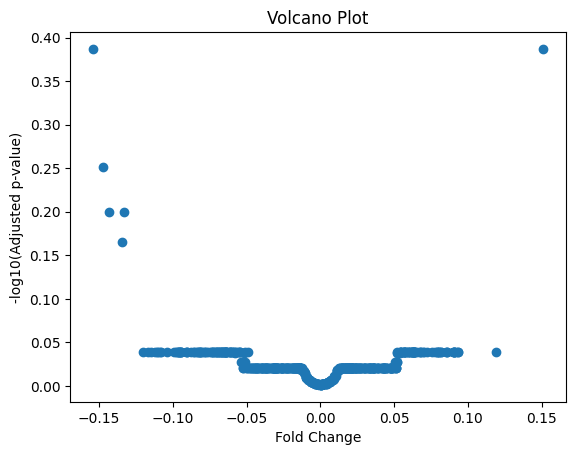

AttributeError: 'Index' object has no attribute 'to_csv'

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the microarray data
data = pd.read_csv('microarray_data.csv')

# Explore the data
print(data.head())  # Display the first few rows
print(data.shape)  # Check the dimensions of the dataframe
print(data.info())  # Get information about the dataframe

# Perform data preprocessing
# Example: Remove missing values
data = data.dropna()

# Perform data analysis
# Example: Group-wise summary statistics
group_summary = data.groupby('Group').describe()
print(group_summary)

# Example: Gene expression distribution by group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Gene_1', data=data)
plt.xlabel('Group')
plt.ylabel('Gene Expression')
plt.title('Gene Expression Distribution by Group')
plt.show()

# Example: Differential expression analysis
control_group = data[data['Group'] == 'Control']
diseased_group = data[data['Group'] == 'Diseased']

# Perform statistical test, e.g., t-test
from scipy.stats import ttest_ind
_, p_values = ttest_ind(control_group.iloc[:, :-1], diseased_group.iloc[:, :-1])

# Adjust p-values for multiple testing, e.g., Benjamini-Hochberg correction
from statsmodels.stats.multitest import multipletests
adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

# Identify differentially expressed genes
significance_threshold = 0.05
differentially_expressed_genes = data.columns[:-1][adjusted_p_values < significance_threshold]

# Visualize the results
# Example: Volcano plot
fold_changes = diseased_group.mean() - control_group.mean()
plt.scatter(fold_changes, -np.log10(adjusted_p_values))
plt.xlabel('Fold Change')
plt.ylabel('-log10(Adjusted p-value)')
plt.title('Volcano Plot')
plt.show()

# Save the results
# Example: Save differentially expressed genes to a file
differentially_expressed_genes.to_csv('differentially_expressed_genes.csv', index=False)


# More data points

In [8]:
import pandas as pd
import numpy as np

# Define the number of samples and genes
num_samples = 500  # Number of samples
num_genes = 1000  # Number of genes

# Generate synthetic data
np.random.seed(0)  # Set random seed for reproducibility

# Create a dataframe with random gene expression values
data = pd.DataFrame(np.random.rand(num_samples, num_genes), columns=[f'Gene_{i}' for i in range(1, num_genes+1)])

# Add a column for the group labels
group_labels = ['Control', 'Diseased', 'Other Suitable Group']
data['Group'] = np.random.choice(group_labels, size=num_samples)

# Save the dataframe to a CSV file
data.to_csv('microarray_data.csv', index=False)

# Confirm the file creation
print("CSV file 'microarray_data.csv' has been created successfully.")


CSV file 'microarray_data.csv' has been created successfully.


     Gene_1    Gene_2    Gene_3    Gene_4    Gene_5    Gene_6    Gene_7  \
0  0.548814  0.715189  0.602763  0.544883  0.423655  0.645894  0.437587   
1  0.592880  0.010064  0.475826  0.708770  0.043975  0.879521  0.520081   
2  0.811518  0.476084  0.523156  0.250521  0.605043  0.302905  0.577284   
3  0.413962  0.629618  0.778584  0.851558  0.816413  0.166077  0.828390   
4  0.292642  0.566518  0.137414  0.349712  0.053216  0.379068  0.114151   

     Gene_8    Gene_9   Gene_10  ...  Gene_992  Gene_993  Gene_994  Gene_995  \
0  0.891773  0.963663  0.383442  ...  0.322830  0.229567  0.506863  0.736853   
1  0.030661  0.224414  0.953676  ...  0.875200  0.027653  0.660339  0.414439   
2  0.169678  0.159469  0.417030  ...  0.475214  0.287293  0.879682  0.284927   
3  0.058629  0.200171  0.622927  ...  0.241751  0.187770  0.404680  0.119904   
4  0.561813  0.641594  0.987092  ...  0.221001  0.235428  0.152850  0.692918   

   Gene_996  Gene_997  Gene_998  Gene_999  Gene_1000     Group  
0  

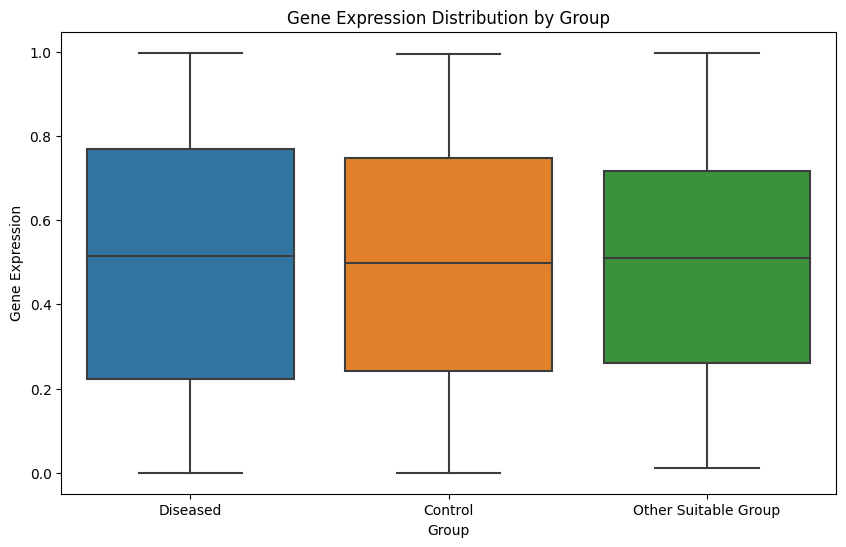

C:\Users\paul\AppData\Local\Temp\ipykernel_19744\2445124984.py:48: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  fold_changes = diseased_group.mean() - control_group.mean()
C:\Users\paul\AppData\Local\Temp\ipykernel_19744\2445124984.py:48: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  fold_changes = diseased_group.mean() - control_group.mean()


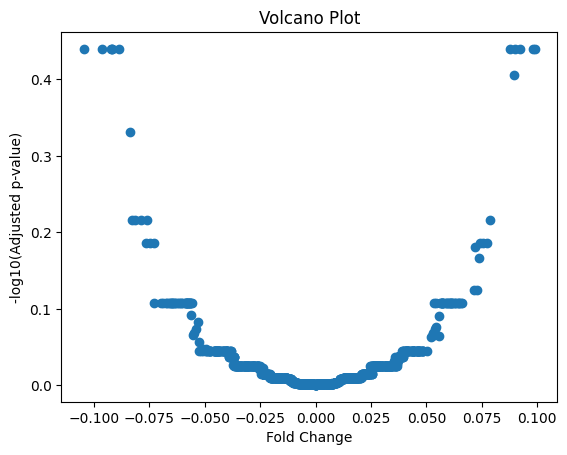

AttributeError: 'Index' object has no attribute 'to_csv'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the microarray data
data = pd.read_csv('microarray_data.csv')

# Explore the data
print(data.head())  # Display the first few rows
print(data.shape)  # Check the dimensions of the dataframe
print(data.info())  # Get information about the dataframe

# Perform data preprocessing
# Example: Remove missing values
data = data.dropna()

# Perform data analysis
# Example: Group-wise summary statistics
group_summary = data.groupby('Group').describe()
print(group_summary)

# Example: Gene expression distribution by group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Gene_1', data=data)
plt.xlabel('Group')
plt.ylabel('Gene Expression')
plt.title('Gene Expression Distribution by Group')
plt.show()

# Example: Differential expression analysis
control_group = data[data['Group'] == 'Control']
diseased_group = data[data['Group'] == 'Diseased']

# Perform statistical test, e.g., t-test
from scipy.stats import ttest_ind
_, p_values = ttest_ind(control_group.iloc[:, :-1], diseased_group.iloc[:, :-1])

# Adjust p-values for multiple testing, e.g., Benjamini-Hochberg correction
from statsmodels.stats.multitest import multipletests
adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

# Identify differentially expressed genes
significance_threshold = 0.05
differentially_expressed_genes = data.columns[:-1][adjusted_p_values < significance_threshold]

# Visualize the results
# Example: Volcano plot
fold_changes = diseased_group.mean() - control_group.mean()
plt.scatter(fold_changes, -np.log10(adjusted_p_values))
plt.xlabel('Fold Change')
plt.ylabel('-log10(Adjusted p-value)')
plt.title('Volcano Plot')
plt.show()

# Save the results
# Example: Save differentially expressed genes to a file
differentially_expressed_genes.to_csv('differentially_expressed_genes.csv', index=False)


# STEP 3

In [10]:
import pandas as pd
import numpy as np

# Define the number of samples and genes
num_samples = 1000  # Number of samples
num_genes = 5000  # Number of genes

# Generate synthetic data
np.random.seed(0)  # Set random seed for reproducibility

# Create a dataframe with random gene expression values
data = pd.DataFrame(np.random.normal(loc=0, scale=1, size=(num_samples, num_genes)),
                    columns=[f'Gene_{i}' for i in range(1, num_genes+1)])

# Add a column for the group labels
group_labels = ['Control', 'Diseased', 'Other Suitable Group']
data['Group'] = np.random.choice(group_labels, size=num_samples)

# Save the dataframe to a CSV file
data.to_csv('microarray_data.csv', index=False)

# Confirm the file creation
print("CSV file 'microarray_data.csv' has been created successfully.")


CSV file 'microarray_data.csv' has been created successfully.


     Gene_1    Gene_2    Gene_3    Gene_4    Gene_5    Gene_6    Gene_7  \
0  1.764052  0.400157  0.978738  2.240893  1.867558 -0.977278  0.950088   
1  0.309724 -0.737456 -1.536920 -0.562255 -1.599511  0.824390  2.491486   
2 -0.202117 -0.833231  1.733600  0.190649 -0.177810 -1.085025  0.972262   
3  2.469982  0.587017 -0.397353  0.433550  0.500297  1.236835 -1.019225   
4  0.330046 -0.000480  0.818116  0.428214 -2.503947  0.120481  0.807893   

     Gene_8    Gene_9   Gene_10  ...  Gene_4992  Gene_4993  Gene_4994  \
0 -0.151357 -0.103219  0.410599  ...   0.424889  -0.271260  -0.683568   
1  1.011855 -0.281238  0.016707  ...  -0.962750   0.493405   2.133050   
2  1.431472 -0.245073 -0.623254  ...   1.916623  -1.248133   0.127620   
3 -0.472224  0.142993 -0.664375  ...   2.018161   0.066968   2.736475   
4  0.602121 -0.865190 -0.153320  ...   1.523423  -0.585699   0.846588   

   Gene_4995  Gene_4996  Gene_4997  Gene_4998  Gene_4999  Gene_5000  \
0  -1.537438  -0.101374   0.746666   0.

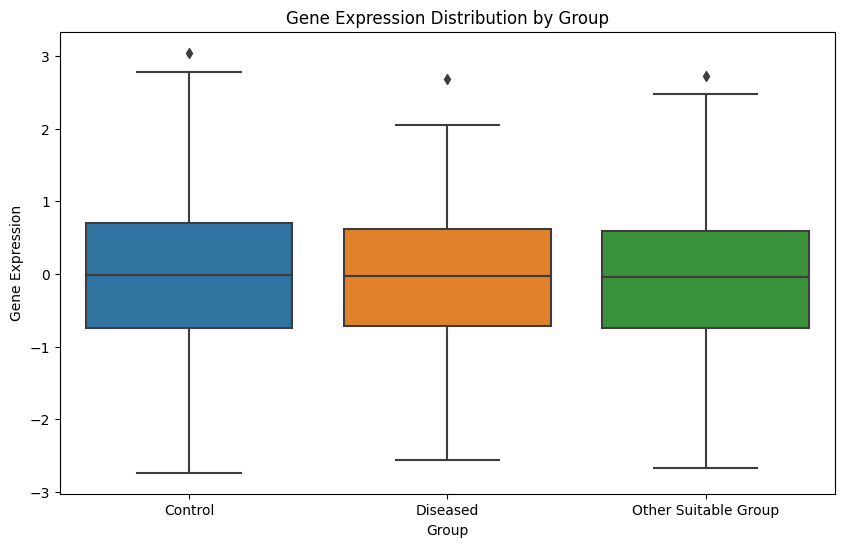

C:\Users\paul\AppData\Local\Temp\ipykernel_19744\2445124984.py:48: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  fold_changes = diseased_group.mean() - control_group.mean()
C:\Users\paul\AppData\Local\Temp\ipykernel_19744\2445124984.py:48: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  fold_changes = diseased_group.mean() - control_group.mean()


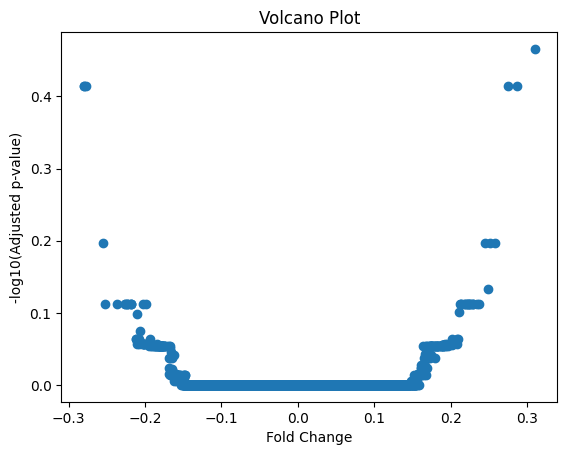

AttributeError: 'Index' object has no attribute 'to_csv'

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the microarray data
data = pd.read_csv('microarray_data.csv')

# Explore the data
print(data.head())  # Display the first few rows
print(data.shape)  # Check the dimensions of the dataframe
print(data.info())  # Get information about the dataframe

# Perform data preprocessing
# Example: Remove missing values
data = data.dropna()

# Perform data analysis
# Example: Group-wise summary statistics
group_summary = data.groupby('Group').describe()
print(group_summary)

# Example: Gene expression distribution by group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Gene_1', data=data)
plt.xlabel('Group')
plt.ylabel('Gene Expression')
plt.title('Gene Expression Distribution by Group')
plt.show()

# Example: Differential expression analysis
control_group = data[data['Group'] == 'Control']
diseased_group = data[data['Group'] == 'Diseased']

# Perform statistical test, e.g., t-test
from scipy.stats import ttest_ind
_, p_values = ttest_ind(control_group.iloc[:, :-1], diseased_group.iloc[:, :-1])

# Adjust p-values for multiple testing, e.g., Benjamini-Hochberg correction
from statsmodels.stats.multitest import multipletests
adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

# Identify differentially expressed genes
significance_threshold = 0.05
differentially_expressed_genes = data.columns[:-1][adjusted_p_values < significance_threshold]

# Visualize the results
# Example: Volcano plot
fold_changes = diseased_group.mean() - control_group.mean()
plt.scatter(fold_changes, -np.log10(adjusted_p_values))
plt.xlabel('Fold Change')
plt.ylabel('-log10(Adjusted p-value)')
plt.title('Volcano Plot')
plt.show()

# Save the results
# Example: Save differentially expressed genes to a file
differentially_expressed_genes.to_csv('differentially_expressed_genes.csv', index=False)
